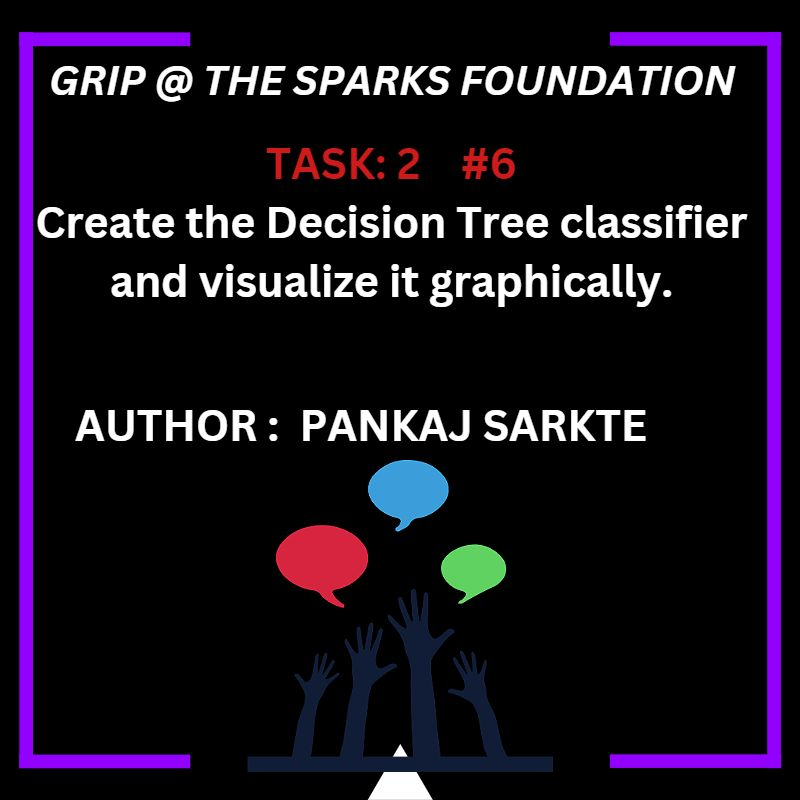

Importing librarie

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

Importing data

In [ ]:
iris = pd.read_csv('/content/Iris.csv')
#iris = pd.read_csv("C:/Users/Mythili/Desktop/Iris.csv")

In [ ]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.shape

(150, 6)

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

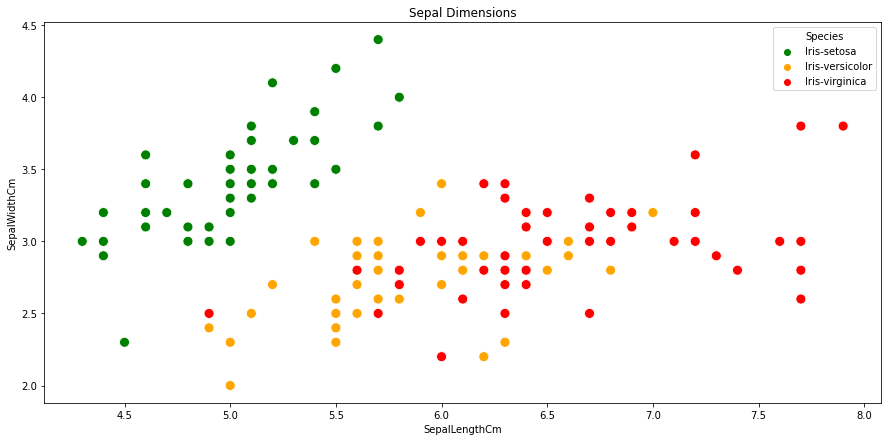

In [ ]:
# Sepal Dimensions
plt.figure(figsize=(15,7))
plt.title('Sepal Dimensions')

sns.scatterplot(x=iris['SepalLengthCm'], y=iris['SepalWidthCm'], hue=iris['Species'], palette=['green', 'orange', 'red'], s=100)
plt.show()


The plt gives information the species "iris-setosa" has small sepal length and large sepal width,  where as species "iris-verginica" has large sepal length and small sepal width. In some cases it is very difficult is classify species "iris-versicolor" and species "iris-verginica" they almost have same sepal dimentions. Here it is easy to seperate species "iris-setosa" from the other species with linear boundary, but it is not possible to seperate species "iris-versicolor" and "iris-verginica" with linear boundary and hence requires complex boundary for seperaton.

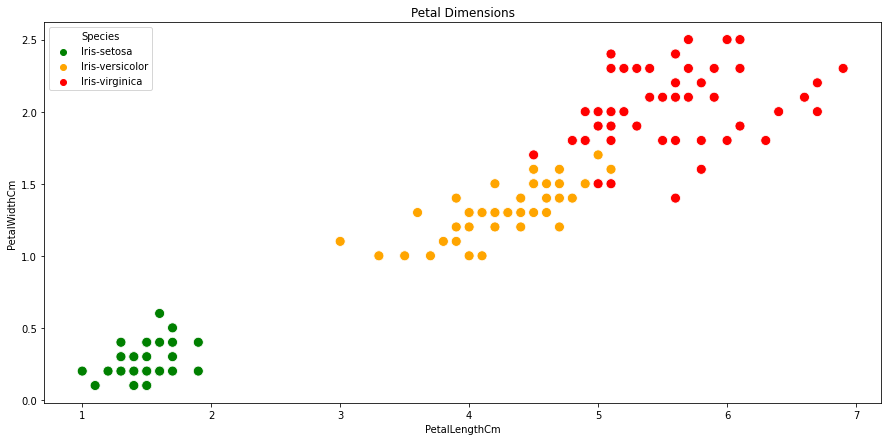

In [ ]:
# Petal Dimensions
plt.figure(figsize=(15,7))
plt.title('Petal Dimensions')

sns.scatterplot(x=iris['PetalLengthCm'], y=iris['PetalWidthCm'], hue=iris['Species'], palette=['green', 'orange', 'red'], s=100)
plt.show()

Here species "iris-setosa" has small petal length and petal width while opposite holds true for species "2". It can be observed that there is linear relationship between petal length and petal width for all species.

In [ ]:
# analysing the distribution of sepal and petal dimensions

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <a list of 10 Patch objects>)

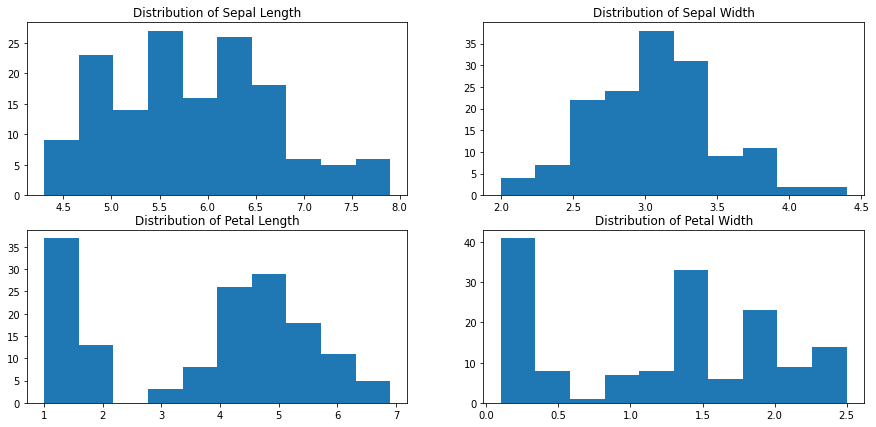

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(15,7))

axes[0,0].set_title('Distribution of Sepal Length')
axes[0,0].hist(iris['SepalLengthCm'])

axes[0,1].set_title('Distribution of Sepal Width')
axes[0,1].hist(iris['SepalWidthCm'])

axes[1,0].set_title('Distribution of Petal Length')
axes[1,0].hist(iris['PetalLengthCm'])

axes[1,1].set_title('Distribution of Petal Width')
axes[1,1].hist(iris['PetalWidthCm'])


It is observed that sepal width follows normal distribution, while sepal length is lightly right skewed.

**Analysing correlation between feature and Target**

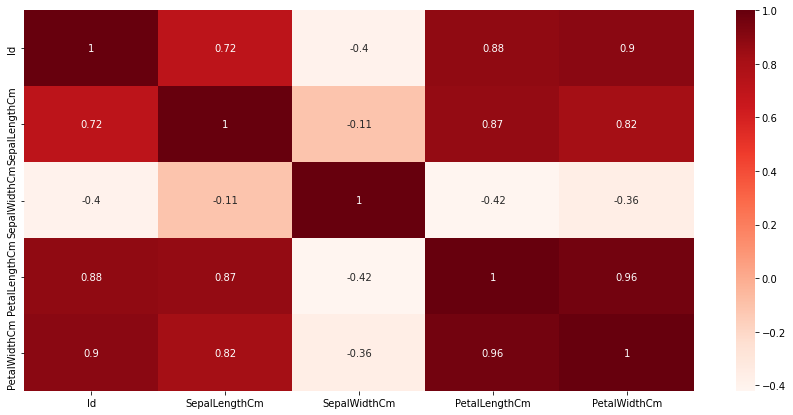

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(iris.corr(), annot=True, cmap='Reds')

The plot insightes that Petal width and length are highly correlated, while the sepal length and width are not correlated.

In [ ]:
iris.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
iris.drop(['Id'], inplace=True, axis=1)

In [ ]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Splitting The Data into Training And Testing Dataset**

In [ ]:
train, test = train_test_split(iris, test_size=0.2)

In [ ]:
train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
138,6.0,3.0,4.8,1.8,Iris-virginica
57,4.9,2.4,3.3,1.0,Iris-versicolor
47,4.6,3.2,1.4,0.2,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor
77,6.7,3.0,5.0,1.7,Iris-versicolor
...,...,...,...,...,...
33,5.5,4.2,1.4,0.2,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa
108,6.7,2.5,5.8,1.8,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica


In [ ]:
train.shape, test.shape

((120, 5), (30, 5))

In [ ]:
iris.keys()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
train_x = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_y = train['Species']

test_x = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_y = test['Species']

In [ ]:
DTree = DecisionTreeClassifier()
DTree.fit(train_x, train_y)

DecisionTreeClassifier()

In [ ]:
prediction = DTree.predict(test_x)
prediction

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

In [ ]:
print("Accuracy of the Decision tree is: ", metrics.accuracy_score(prediction, test_y))

Accuracy of the Decision tree is:  0.9333333333333333


In [ ]:
iris.Species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X,y)

DecisionTreeClassifier()

In [ ]:
prediction_dtree = dtree.predict(X)
prediction_dtree

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
print("Accuracy of the Decision tree for whole data is: ", metrics.accuracy_score(prediction_dtree, y))

Accuracy of the Decision tree for whole data is:  1.0


**Let us visualize the Decision Tree to understand it better**

In [ ]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from six import StringIO

In [ ]:
from IPython.display import Image

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
import pydot

In [ ]:
dot_data = StringIO()

In [ ]:
features = list(iris.columns)
features.remove("Species")
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [ ]:
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True, special_characters=True)

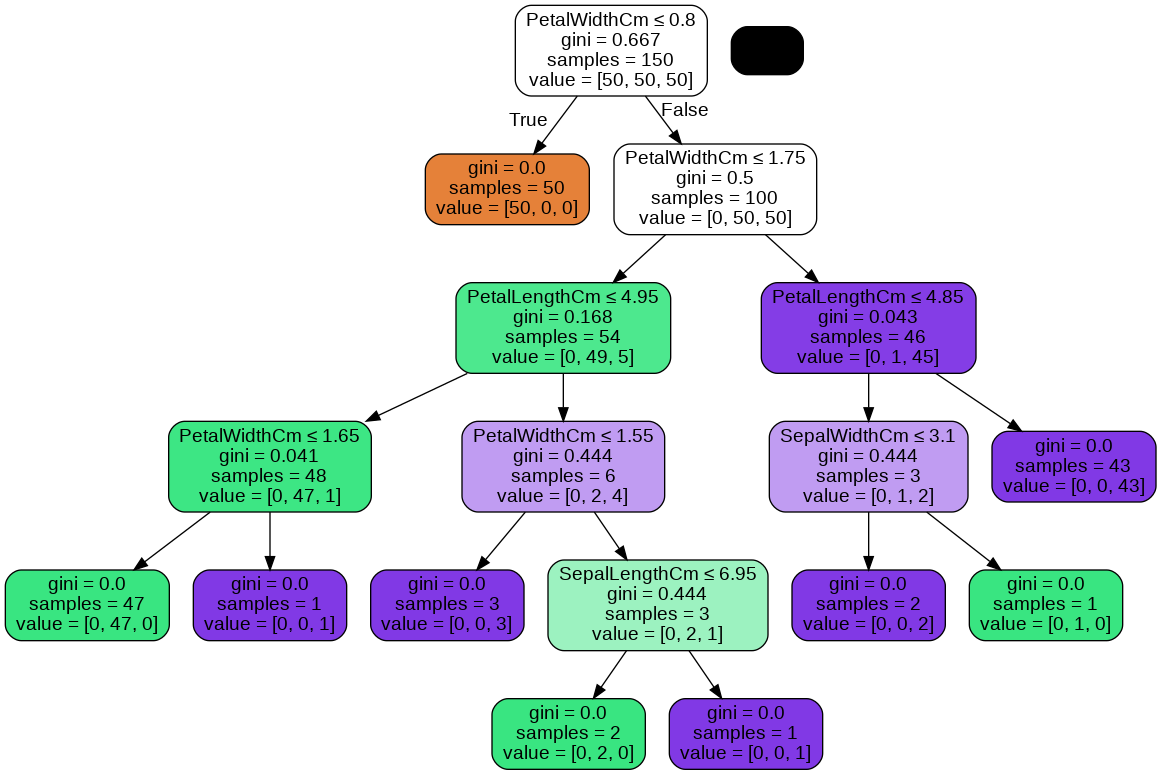

In [ ]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Thank You